## Importing libraries in Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
%matplotlib inline

## Getting the data

In [2]:
df = pd.read_csv("crime.csv", encoding='unicode_escape')
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018/9/2 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018/8/21 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018/9/3 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018/9/3 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018/9/3 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018/9/3 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018/9/3 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018/9/3 20:39,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018/9/3 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018/9/3 20:38,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [4]:
df.drop_duplicates(inplace=True)
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [5]:
# clear data without latitude and longitude
df = df[df['Location']!="(-1.00000000, -1.00000000)"]

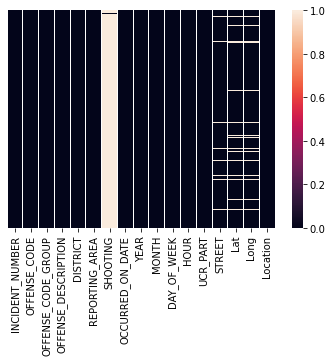

In [6]:
fig = plt.figure()
sns.heatmap(df.isnull(), yticklabels="")

In [7]:
# drop column 'SHOOTING' since there are lots of missing data
df.drop('SHOOTING', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318305 entries, 0 to 319072
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      318305 non-null  object 
 1   OFFENSE_CODE         318305 non-null  int64  
 2   OFFENSE_CODE_GROUP   318305 non-null  object 
 3   OFFENSE_DESCRIPTION  318305 non-null  object 
 4   DISTRICT             317124 non-null  object 
 5   REPORTING_AREA       318305 non-null  object 
 6   OCCURRED_ON_DATE     318305 non-null  object 
 7   YEAR                 318305 non-null  int64  
 8   MONTH                318305 non-null  int64  
 9   DAY_OF_WEEK          318305 non-null  object 
 10  HOUR                 318305 non-null  int64  
 11  UCR_PART             318215 non-null  object 
 12  STREET               307538 non-null  object 
 13  Lat                  298307 non-null  float64
 14  Long                 298307 non-null  float64
 15  Location         

## Relationship between Date, Time and District (Number of crimes)

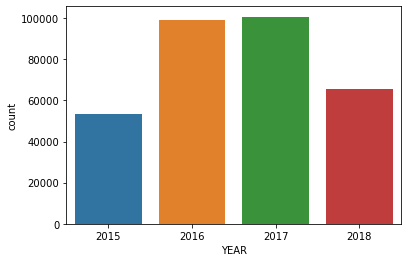

In [9]:
sns.countplot(data=df, x='YEAR')

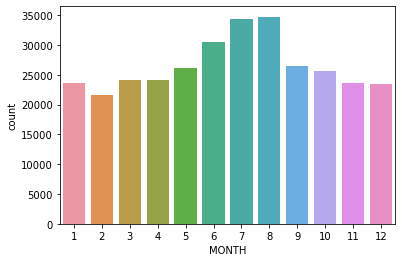

In [10]:
sns.countplot(data=df, x='MONTH')

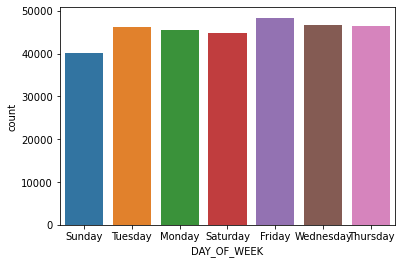

In [11]:
sns.countplot(data=df, x='DAY_OF_WEEK')

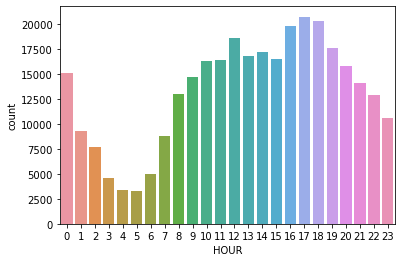

In [12]:
sns.countplot(data=df, x='HOUR')

In [13]:
data = df.groupby(['MONTH', 'DISTRICT']).count()
data

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
MONTH DISTRICT                                                      
1     A1                   2558          2558                2558   
      A15                   476           476                 476   
      A7                   1039          1039                1039   
      B2                   3782          3782                3782   
      B3                   2675          2675                2675   
...                         ...           ...                 ...   
12    D14                  1459          1459                1459   
      D4                   3115          3115                3115   
      E13                  1289          1289                1289   
      E18                  1303          1303                1303   
      E5                    971           971                 971   

                OFFENSE_DESCRIPTION  REPORTING_AREA  OCCURRED_ON_DATE  YEAR  \
MONTH DISTRICT                                                                
1     A1                       2558            2558              2558  2558   
      A15                       476             476               476   476   
      A7                       1039            1039              1039  1039   
      B2                       3782            3782              3782  3782   
      B3                       2675            2675              2675  2675   
...                             ...             ...               ...   ...   
12    D14                      1459            1459              1459  1459   
      D4                       3115            3115              3115  3115   
      E13                      1289            1289              1289  1289   
      E18                      1303            1303              1303  1303   
      E5                        971             971               971   971   

                DAY_OF_WEEK  HOUR  UCR_PART  STREET   Lat  Long  Location  
MONTH DISTRICT                                                             
1     A1               2558  2558      2558    2462  2386  2386      2558  
      A15               476   476       476     471   468   468       476  
      A7               1039  1039      1039    1000   982   982      1039  
      B2               3782  3782      3781    3607  3485  3485      3782  
      B3               2675  2675      2674    2622  2579  2579      2675  
...                     ...   ...       ...     ...   ...   ...       ...  
12    D14              1459  1459      1459    1431  1410  1410      1459  
      D4               3115  3115      3113    3000  2880  2880      3115  
      E13              1289  1289      1289    1243  1225  1225      1289  
      E18              1303  1303      1301    1271  1251  1251      1303  
      E5                971   971       971     959   936   936       971  

[144 rows x 14 columns]

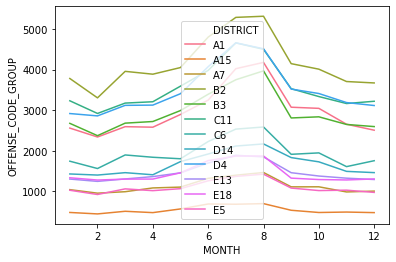

In [14]:
sns.lineplot(data=df.groupby(['MONTH', 'DISTRICT']).count().reset_index(), x='MONTH', y='OFFENSE_CODE_GROUP', hue='DISTRICT')


## Data Map View

In [15]:
vand = df[df['OFFENSE_CODE_GROUP']=='Vandalism']
vand = vand[['Lat','Long']]
vand.Lat.fillna(0, inplace = True)
vand.Long.fillna(0, inplace = True)

BostonMap = folium.Map(location=[42.356145,-71.064083],zoom_start=11)
HeatMap(data=vand, radius=16).add_to(BostonMap)

BostonMap

In [16]:
missing = df[df['OFFENSE_CODE_GROUP']=='Missing Person Reported']
missing = missing[['Lat','Long']]
missing.Lat.fillna(0, inplace = True)
missing.Long.fillna(0, inplace = True)

BostonMap = folium.Map(location=[42.356145,-71.064083],zoom_start=11)
HeatMap(data=missing, radius=16).add_to(BostonMap)

BostonMap